# Data Treatment/Mugging/Wrangling

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('mtcars.csv')
print(data.shape)
data.head()

(32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


## Treating Missing Values

In [3]:
data = pd.read_csv('mtcars_missing.csv')
print(data.shape)
data.head()

(32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [4]:
# NaN represents missing values
np.nan

nan

In [5]:
5 == 5

True

In [6]:
np.nan == np.nan

False

## First Step: find chars representing missing values

In [7]:
data.sort_values(['mpg'], ascending=False).head(2)

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
19,Toyota Corolla,33.9,4,71.1,65.0,4.22,1.835,19.9,1,1,4,1


In [8]:
data.mpg.sort_values(ascending=False) ## Here 999 is also consider as NUll/NaN value

3     999.0
19     33.9
17     32.4
27     30.4
18     30.4
25     27.3
26     26.0
4      22.8
20     21.5
31     21.4
1      21.0
0      21.0
29     19.7
9      19.2
24     19.2
5      18.1
7      18.1
8      18.1
10     17.8
12     17.3
11     16.4
28     15.8
21     15.5
22     15.2
13     15.2
30     15.0
16     14.7
6      14.3
23     13.3
14     10.4
15     10.4
2       NaN
Name: mpg, dtype: float64

In [6]:
data.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [9]:
data.isnull().sum()  ## Finding all the NaN values

car_model    0
mpg          1
cyl          0
disp         2
hp           2
drat         1
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [19]:
data.disp.sort_values(ascending=True) ## Here $ is also consider as NaN value

1         $
2       108
20    120.1
26    120.3
31      121
29      145
0       160
9     167.6
10    167.6
5       225
8       225
7       225
11    275.8
12    275.8
13    275.8
30      301
22      304
21      318
23      350
28      351
6       360
24      400
16      440
15      460
14      472
19     71.1
18     75.7
17     78.7
25       79
27     95.1
3       NaN
4       NaN
Name: disp, dtype: object

In [15]:
data.hp.sort_values(ascending=True) ## Here NaN is a NaN value :)

18     52.0
19     65.0
25     66.0
17     66.0
26     91.0
4      93.0
20     97.0
5     105.0
7     105.0
8     105.0
31    109.0
0     110.0
1     110.0
27    113.0
10    123.0
9     123.0
22    150.0
21    150.0
29    175.0
24    175.0
12    180.0
11    180.0
13    180.0
14    205.0
15    215.0
16    230.0
23    245.0
6     245.0
28    264.0
30    335.0
2       NaN
3       NaN
Name: hp, dtype: float64

In [23]:
data.qsec.sort_values(ascending=True) ## ## Here *, - is also consider as NaN value

1         *
3         -
28     14.5
30     14.6
23    15.41
29     15.5
6     15.84
0     16.46
26     16.7
21    16.87
27     16.9
24    17.05
22     17.3
11     17.4
16    17.42
12     17.6
15    17.82
14    17.98
13       18
9      18.3
18    18.52
31     18.6
4     18.61
2     18.61
10     18.9
25     18.9
17    19.47
19     19.9
20    20.01
8     20.22
7     20.22
5     20.22
Name: qsec, dtype: object

In [13]:
data.isnull().sum()

car_model    0
mpg          1
cyl          0
disp         2
hp           2
drat         1
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

## Second Step : Data Replace for Missing/Inconsistant values

In [11]:
data.replace(['$','?','-','*'], np.nan, inplace=True)

In [12]:
data

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


In [13]:
data.loc[:,['mpg','drat','wt']].replace(['$','?','-','*'], np.nan, inplace=True) ## Replace specified columns only

In [13]:
data.isnull() ## Details for all null values with True for NULL and False for NON-NULL

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:

data.isnull().sum()  ## Sum/Summary of all null values

car_model    0
mpg          1
cyl          0
disp         3
hp           2
drat         1
wt           1
qsec         2
vs           0
am           0
gear         0
carb         0
dtype: int64

In [16]:
data.describe()

,mpg,cyl,hp,drat,vs,am,gear,carb
count,31.000000,32.000000,30.000000,31.000000,32.000000,32.000000,32.000000,32.000000
mean,51.316129,6.187500,148.733333,3.541935,0.468750,0.437500,3.656250,2.718750
std,175.986930,1.712148,68.753901,0.572389,0.507007,0.504016,0.745281,1.689328
min,10.400000,4.000000,52.000000,2.760000,0.000000,0.000000,3.000000,1.000000
25%,15.350000,4.000000,105.000000,3.070000,0.000000,0.000000,3.000000,1.000000
50%,18.100000,6.000000,123.000000,3.620000,0.000000,0.000000,3.500000,2.000000
75%,22.150000,8.000000,180.000000,3.920000,1.000000,1.000000,4.000000,4.000000
max,999.000000,8.000000,335.000000,4.930000,1.000000,1.000000,5.000000,8.000000


In [36]:
data[data.mpg == 999]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1


In [37]:
data.loc[3,'mpg'] = np.nan

In [38]:
data.describe()

,mpg,cyl,hp,drat,vs,am,gear,carb
count,30.000000,32.000000,30.000000,31.000000,32.000000,32.000000,32.000000,32.000000
mean,19.726667,6.187500,148.733333,3.541935,0.468750,0.437500,3.656250,2.718750
std,6.160046,1.712148,68.753901,0.572389,0.507007,0.504016,0.745281,1.689328
min,10.400000,4.000000,52.000000,2.760000,0.000000,0.000000,3.000000,1.000000
25%,15.275000,4.000000,105.000000,3.070000,0.000000,0.000000,3.000000,1.000000
50%,18.100000,6.000000,123.000000,3.620000,0.000000,0.000000,3.500000,2.000000
75%,21.475000,8.000000,180.000000,3.920000,1.000000,1.000000,4.000000,4.000000
max,33.900000,8.000000,335.000000,4.930000,1.000000,1.000000,5.000000,8.000000


In [39]:
## More recrods fro 999 as value then use as generic like the below one
data.loc[data.mpg==999,'mpg'] = np.nan

## Data Cleaning Assignment

In [11]:
a_data = pd.read_csv('adult.csv',header=None, skipinitialspace=True)
a_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
a_data.columns = ['age','workclass','fnlwgt','education','educationNum','marital',
           'occupation','relationship','race','sex','capGain','capLoss',
          'HoursWeek','NativeCountry','category']

In [13]:
a_data.head()

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationNum     32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capGain          32561 non-null int64
capLoss          32561 non-null int64
HoursWeek        32561 non-null int64
NativeCountry    32561 non-null object
category         32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
a_data.describe()

,age,fnlwgt,educationNum,capGain,capLoss,HoursWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
a_data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
marital          0
occupation       0
relationship     0
race             0
sex              0
capGain          0
capLoss          0
HoursWeek        0
NativeCountry    0
category         0
dtype: int64

In [17]:
a_data.head()

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
a_data.head()

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
a_data.NativeCountry.sort_values(ascending=False)

18247    Yugoslavia
4447     Yugoslavia
31519    Yugoslavia
7287     Yugoslavia
23814    Yugoslavia
12816    Yugoslavia
28487    Yugoslavia
1025     Yugoslavia
29437    Yugoslavia
12506    Yugoslavia
20549    Yugoslavia
13125    Yugoslavia
30543    Yugoslavia
26614    Yugoslavia
22200    Yugoslavia
6328     Yugoslavia
13821       Vietnam
18031       Vietnam
26878       Vietnam
3832        Vietnam
4168        Vietnam
17269       Vietnam
31079       Vietnam
28773       Vietnam
15124       Vietnam
19511       Vietnam
2259        Vietnam
14507       Vietnam
4826        Vietnam
2653        Vietnam
            ...    
10343             ?
5841              ?
27383             ?
1581              ?
8477              ?
31128             ?
5709              ?
1593              ?
23284             ?
24980             ?
23236             ?
453               ?
5963              ?
12315             ?
15932             ?
15931             ?
12329             ?
18233             ?
10408             ?


In [20]:
a_data.replace(['?'], np.nan, inplace=True)
a_data.replace('?',np.nan,inplace=True)

In [21]:
a_data.isnull().sum()

age                 0
workclass        1836
fnlwgt              0
education           0
educationNum        0
marital             0
occupation       1843
relationship        0
race                0
sex                 0
capGain             0
capLoss             0
HoursWeek           0
NativeCountry     583
category            0
dtype: int64

In [22]:
a_data.head()

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
a_data.isnull().sum()

age                 0
workclass        1836
fnlwgt              0
education           0
educationNum        0
marital             0
occupation       1843
relationship        0
race                0
sex                 0
capGain             0
capLoss             0
HoursWeek           0
NativeCountry     583
category            0
dtype: int64

In [24]:
a_data.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [25]:
a_data.capGain.sort_values().unique()

array([    0,   114,   401,   594,   914,   991,  1055,  1086,  1111,
        1151,  1173,  1409,  1424,  1455,  1471,  1506,  1639,  1797,
        1831,  1848,  2009,  2036,  2050,  2062,  2105,  2174,  2176,
        2202,  2228,  2290,  2329,  2346,  2354,  2387,  2407,  2414,
        2463,  2538,  2580,  2597,  2635,  2653,  2829,  2885,  2907,
        2936,  2961,  2964,  2977,  2993,  3103,  3137,  3273,  3325,
        3411,  3418,  3432,  3456,  3464,  3471,  3674,  3781,  3818,
        3887,  3908,  3942,  4064,  4101,  4386,  4416,  4508,  4650,
        4687,  4787,  4865,  4931,  4934,  5013,  5060,  5178,  5455,
        5556,  5721,  6097,  6360,  6418,  6497,  6514,  6723,  6767,
        6849,  7298,  7430,  7443,  7688,  7896,  7978,  8614,  9386,
        9562, 10520, 10566, 10605, 11678, 13550, 14084, 14344, 15020,
       15024, 15831, 18481, 20051, 22040, 25124, 25236, 27828, 34095,
       41310, 99999])

In [27]:
#a_data['capGain'].unique()
a_data.capGain.value_counts(ascending=True)

1111         1
22040        1
6097         1
1455         1
4931         1
5060         1
2387         1
2538         1
1639         1
7978         1
18481        2
2062         2
11678        2
401          2
2993         2
3456         2
6723         2
41310        2
6360         3
2009         3
5721         3
1173         3
2936         3
4687         3
7896         3
2961         3
1424         3
25124        4
1086         4
9562         4
         ...  
2176        23
4787        23
3411        24
2885        24
1055        25
14344       26
6849        27
13550       27
2829        31
3908        32
594         34
27828       34
3137        37
20051       37
14084       41
4650        41
4064        42
10520       43
2174        48
3325        53
8614        55
5013        69
4386        70
3103        97
5178        97
99999      159
7298       246
7688       284
15024      347
0        29849
Name: capGain, Length: 119, dtype: int64

In [28]:
a_data[a_data.capGain==0]

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [37]:
## Missing values records less than % we drop them
data.shape

(32, 12)

In [38]:
data.dropna().shape

(28, 12)

In [19]:
data.dropna().shape[0] ## I am more interest on ROWs only :)


28

In [21]:
data.shape[0]-data.dropna().shape[0]

4

### We are finding the missing values % in the total count. In general if the missing values is more than 5% leave the missing values as it is
### Else need to treat and make it valid records

In [22]:
((data.shape[0]- data.dropna().shape[0])/data.shape[0])*100

12.5

## Filling the missing values

In [24]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [26]:
data.fillna(method='ffill') ## Forward filling means the nearest previous values

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,3.90,2.875,*,0,1,4,4
2,Datsun 710,21.0,4,108,110.0,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,108,110.0,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,108,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


In [43]:
data.fillna(method='bfill') ## Forward filling means the nearest previous values

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,108,110.0,3.85,2.875,18.61,0,1,4,4
2,Datsun 710,999.0,4,108,93.0,3.85,3.215,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,225,93.0,3.08,3.215,18.61,1,0,3,1
4,Datsun 710,22.8,4,225,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


In [27]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [ ]:
data.disp = data.disp.astype('float')
data.wt = data.wt.astype('float')
data.qsec = data.qsec.astype('float')

In [32]:
## Mean replacement -- it is the best practice to fill the missing values -- for continus vairables
data.fillna(data.mean(), inplace=True)

In [33]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000000,6,160,110.000000,3.900000,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.000000,6,$,110.000000,3.541935,2.875,*,0,1,4,4
2,Datsun 710,51.316129,4,108,148.733333,3.850000,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.000000,6,NaN,148.733333,3.080000,3.215,-,1,0,3,1
4,Datsun 710,22.800000,4,NaN,93.000000,3.850000,2.32,18.61,1,1,4,1


In [34]:
data.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         2
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [38]:
data['car_model'].value_counts()
data.car_model.value_counts()


Datsun 710             2
Valiant                2
Mazda RX4 Wag          1
Lincoln Continental    1
Merc 450SE             1
Duster 360             1
Cadillac Fleetwood     1
Toyota Corolla         1
Mazda RX4              1
Merc 450SL             1
Fiat 128               1
Dodge Challenger       1
Pontiac Firebird       1
Valiant 2              1
Chrysler Imperial      1
Merc 280               1
Merc 450SLC            1
AMC Javelin            1
Hornet 4 Drive         1
Toyota Corona          1
Ferrari Dino           1
Maserati Bora          1
Lotus Europa           1
Volvo 142E             1
Porsche 914-2          1
Honda Civic            1
Merc 280C              1
Fiat X1-9              1
Camaro Z28             1
Ford Pantera L         1
Name: car_model, dtype: int64

In [36]:
data.car_model.sort_values()

22            AMC Javelin
14     Cadillac Fleetwood
23             Camaro Z28
16      Chrysler Imperial
2              Datsun 710
4              Datsun 710
21       Dodge Challenger
6              Duster 360
29           Ferrari Dino
17               Fiat 128
25              Fiat X1-9
28         Ford Pantera L
18            Honda Civic
3          Hornet 4 Drive
15    Lincoln Continental
27           Lotus Europa
30          Maserati Bora
0               Mazda RX4
1           Mazda RX4 Wag
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
24       Pontiac Firebird
26          Porsche 914-2
19         Toyota Corolla
20          Toyota Corona
8                 Valiant
5                 Valiant
7               Valiant 2
31             Volvo 142E
Name: car_model, dtype: object

In [37]:
data['car_model'].sort_values()

22            AMC Javelin
14     Cadillac Fleetwood
23             Camaro Z28
16      Chrysler Imperial
2              Datsun 710
4              Datsun 710
21       Dodge Challenger
6              Duster 360
29           Ferrari Dino
17               Fiat 128
25              Fiat X1-9
28         Ford Pantera L
18            Honda Civic
3          Hornet 4 Drive
15    Lincoln Continental
27           Lotus Europa
30          Maserati Bora
0               Mazda RX4
1           Mazda RX4 Wag
9                Merc 280
10              Merc 280C
11             Merc 450SE
12             Merc 450SL
13            Merc 450SLC
24       Pontiac Firebird
26          Porsche 914-2
19         Toyota Corolla
20          Toyota Corona
8                 Valiant
5                 Valiant
7               Valiant 2
31             Volvo 142E
Name: car_model, dtype: object

In [40]:
data.sort_values('car_model')

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22,AMC Javelin,15.2,8,304,150.0,3.15,3.435,17.3,0,0,3,2
14,Cadillac Fleetwood,10.4,8,472,205.0,2.93,5.25,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350,245.0,3.73,3.84,15.41,0,0,3,4
16,Chrysler Imperial,14.7,8,440,230.0,3.23,5.345,17.42,0,0,3,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1
21,Dodge Challenger,15.5,8,318,150.0,2.76,3.52,16.87,0,0,3,2
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
29,Ferrari Dino,19.7,6,145,175.0,3.62,2.77,15.5,0,1,5,6
17,Fiat 128,32.4,4,78.7,66.0,4.08,2.2,19.47,1,1,4,1


## Date Formats

In [47]:
#import datetime as dt
from datetime import datetime as dt

In [42]:
day = dt.strptime('1987-May-05','%Y-%b-%d')
print(day)

1987-05-05 00:00:00


In [43]:
day.isoweekday()

2

In [44]:
day = dt.strptime('85-January-24','%y-%B-%d')

In [45]:
print(day)

1985-01-24 00:00:00


In [46]:
day = dt.strptime('January,24-85','%B,%d-%y')
print(day)

1985-01-24 00:00:00


## Step 3 : Removing the duplicate values

In [39]:
dup_data = pd.read_csv('mtcars_duplicates.csv')
dup_data.sort_values('hp')

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
12,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
28,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
13,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
29,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
27,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
35,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
11,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
36,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
2,Datsun 710,21.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [54]:
dup_data.shape

(42, 12)

In [55]:
dup_data.car_model.value_counts()

Valiant                3
Pontiac Firebird       2
Merc 280               2
Honda Civic            2
AMC Javelin            2
Chrysler Imperial      2
Datsun 710             2
Camaro Z28             2
Toyota Corolla         2
Fiat 128               2
Valiant 2              2
Mazda RX4              1
Mazda RX4 Wag          1
Hornet 4 Drive         1
Lotus Europa           1
Porsche 914-2          1
Merc 450SE             1
Toyota Corona          1
Dodge Challenger       1
Cadillac Fleetwood     1
Volvo 142E             1
Fiat X1-9              1
Merc 450SLC            1
Maserati Bora          1
Duster 360             1
Lincoln Continental    1
Merc 280C              1
Ford Pantera L         1
Merc 450SL             1
Ferrari Dino           1
Name: car_model, dtype: int64

In [44]:
dup_data.drop_duplicates().shape

(31, 12)

In [45]:
dup_data[dup_data.duplicated()

SyntaxError: unexpected EOF while parsing (<ipython-input-45-ed546a0e0c58>, line 1)

In [48]:
dup_data.shape

(31, 12)

In [50]:
dup_data

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,NaN,2.875,17.02,0,1,4,4
2,Datsun 710,21.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,22.8,6,108.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
9,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
10,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


###### Generally use 2 key fields to find the duplicates eg, combination of email, pincode. Rare chance to get duplicate in this combination, ## It depends case to case


In [51]:
dup_data.drop_duplicates(['wt','qsec'])  ## Here weight and qsec is combination. weight is 3 digit precesion 
                                         ## so very less chance to be a duplicate values. Take columns according to data set       

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,NaN,2.875,17.02,0,1,4,4
2,Datsun 710,21.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,22.8,6,108.0,110,3.08,3.215,19.44,1,0,3,1
5,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
9,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
10,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
11,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
12,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


In [53]:
dup_data.drop_duplicates(['wt','qsec']).shape

(29, 12)

In [54]:
dup_data.shape

(31, 12)

In [66]:
dup_data[dup_data.duplicated(keep=False)].sort_values('car_model') ## Both have duplicate values

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
32,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
20,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
33,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
21,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
10,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
26,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
11,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
28,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
12,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


### Outlier  -- Extreme values or std deviation 3
Even Outier is correct data also remove it

Outlier analysis is an univariant analysis
we almost always remove outliers
Impuring -- do it

In [6]:
%matplotlib inline

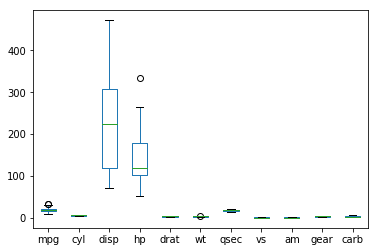

In [8]:
data.plot(kind='box');

In [65]:
data

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.000000,6,160.000000,110.000000,3.900000,2.620000,16.460000,0,1,4,4
1,Mazda RX4 Wag,21.000000,6,233.365517,110.000000,3.541935,2.875000,17.794333,0,1,4,4
2,Datsun 710,51.316129,4,108.000000,148.733333,3.850000,3.228774,18.610000,1,1,4,1
3,Hornet 4 Drive,999.000000,6,233.365517,148.733333,3.080000,3.215000,17.794333,1,0,3,1
4,Datsun 710,22.800000,4,233.365517,93.000000,3.850000,2.320000,18.610000,1,1,4,1
5,Valiant,18.100000,6,225.000000,105.000000,2.760000,3.460000,20.220000,1,0,3,1
6,Duster 360,14.300000,8,360.000000,245.000000,3.210000,3.570000,15.840000,0,0,3,4
7,Valiant 2,18.100000,6,225.000000,105.000000,2.760000,3.460000,20.220000,1,0,3,1
8,Valiant,18.100000,6,225.000000,105.000000,2.760000,3.460000,20.220000,1,0,3,1
9,Merc 280,19.200000,6,167.600000,123.000000,3.920000,3.440000,18.300000,1,0,4,4


In [69]:
data.hp.mean()+2*data.hp.std()

286.24113457493144

In [66]:
data[data.hp > data.hp.mean()+2*data.hp.std()]


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335.0,3.54,3.57,14.6,0,1,5,8


In [71]:
data[(data.hp > data.hp.mean()+2*data.hp.std()) | (data.hp < data.hp.mean()-2*data.hp.std())]


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301,335.0,3.54,3.57,14.6,0,1,5,8


In [30]:
data[(data.mpg > data.mpg.mean()+2*data.mpg.std()) | (data.mpg < data.mpg.mean()-2*data.mpg.std())]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [31]:
data.sort_values(['mpg'])

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
21,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


### Finding Outliers for Audlt Data

In [39]:
a_data.head()

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


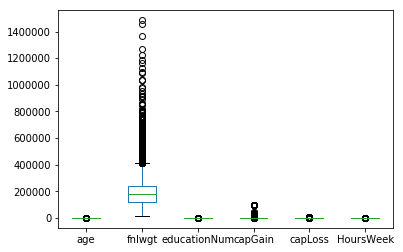

In [40]:
a_data.plot(kind='box')

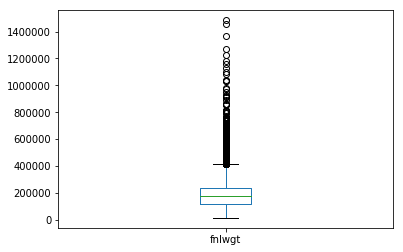

In [41]:
a_data.fnlwgt.plot(kind='box')

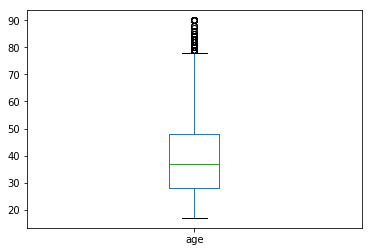

In [42]:
a_data.age.plot(kind='box')

In [75]:
a_data[(a_data.age > a_data.age.mean()+3*a_data.age.std()) | (a_data.age < a_data.age.mean()-3*a_data.age.std())].shape

(121, 15)

In [73]:
a_data[(a_data.age > a_data.age.mean()+2*a_data.age.std()) | (a_data.age < a_data.age.mean()-2*a_data.age.std())].shape

(1158, 15)

## Grouping and Aggregation

In [77]:
data

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,18.3,1,0,4,4


In [76]:
data_group = data.groupby('am')
data_group.mean()

,mpg,cyl,hp,drat,vs,gear,carb
am,,,,,,,
0,70.761111,7.111111,165.470588,3.177778,0.388889,3.111111,2.666667
1,24.392308,5.000000,126.846154,4.046154,0.571429,4.357143,2.785714


In [80]:
data.groupby('am').max()


,car_model,mpg,cyl,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,
0,Valiant 2,999.0,8,245.0,3.92,5.424,20.22,1,4,4
1,Volvo 142E,33.9,8,335.0,4.93,?,19.9,1,5,8


In [81]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [60]:
#Group by engine shape
data_group = data.groupby('vs')
data_group.mean()

,mpg,cyl,disp,hp,drat,wt,qsec,am,gear,carb
vs,,,,,,,,,,
0,16.494118,7.411765,304.041176,190.588235,3.406471,3.703176,16.674706,0.352941,3.588235,3.705882
1,23.706667,4.800000,141.660000,95.000000,3.719333,2.630533,19.121333,0.533333,3.733333,1.600000


In [82]:
#Group by gear
data_group = data.groupby('gear')
data_group.mean()

,mpg,cyl,hp,drat,vs,am,carb
gear,,,,,,,
3,77.29375,7.250000,171.133333,3.085,0.312500,0.000000,2.500000
4,24.72000,4.727273,91.700000,4.086,0.818182,0.818182,2.272727
5,21.38000,6.000000,195.600000,3.916,0.200000,1.000000,4.400000


In [63]:
#Group by gear and automatics
data_group = data.groupby(['am','gear'])
data_group.mean()

mpg       cyl        disp          hp      drat        wt  \
am gear                                                                    
0  3     16.193750  7.250000  311.531250  167.312500  3.085000  3.866812   
   4     18.500000  6.000000  167.600000  123.000000  3.920000  3.440000   
1  4     25.888889  4.444444  106.833333   84.888889  4.102222  2.277778   
   5     21.380000  6.000000  202.480000  195.600000  3.916000  2.632600   

              qsec        vs      carb  
am gear                                 
0  3     18.050000  0.312500  2.500000  
   4     18.600000  1.000000  4.000000  
1  4     18.454444  0.777778  1.888889  
   5     15.640000  0.200000  4.400000

In [60]:
data[(data.cyl > 5) & (data.mpg > 20)]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.000000,3.900000,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.000000,3.541935,2.875,*,0,1,4,4
3,Hornet 4 Drive,999.0,6,NaN,148.733333,3.080000,3.215,-,1,0,3,1
